In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
 
import json 

### <a name="C10">df_business</a>

In [2]:
df_business = pd.read_json('C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/Dataset/yelp_academic_dataset_business.json', lines=True)

In [3]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [4]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [6]:
value_counts = df_business['categories'].value_counts().sort_values(ascending=False)
print(value_counts)

categories
Beauty & Spas, Nail Salons                                                            1012
Restaurants, Pizza                                                                     935
Nail Salons, Beauty & Spas                                                             934
Pizza, Restaurants                                                                     823
Restaurants, Mexican                                                                   728
                                                                                      ... 
Eyelash Service, Eyebrow Services, Hair Removal, Beauty & Spas, Threading Services       1
Fashion, Accessories, Eyewear & Opticians, Shopping                                      1
Bars, Restaurants, Nightlife, Cocktail Bars, Italian, Seafood                            1
Parks, Active Life, Public Services & Government, Landmarks & Historical Buildings       1
Beauty & Spas, Permanent Makeup, Piercing, Tattoo                              

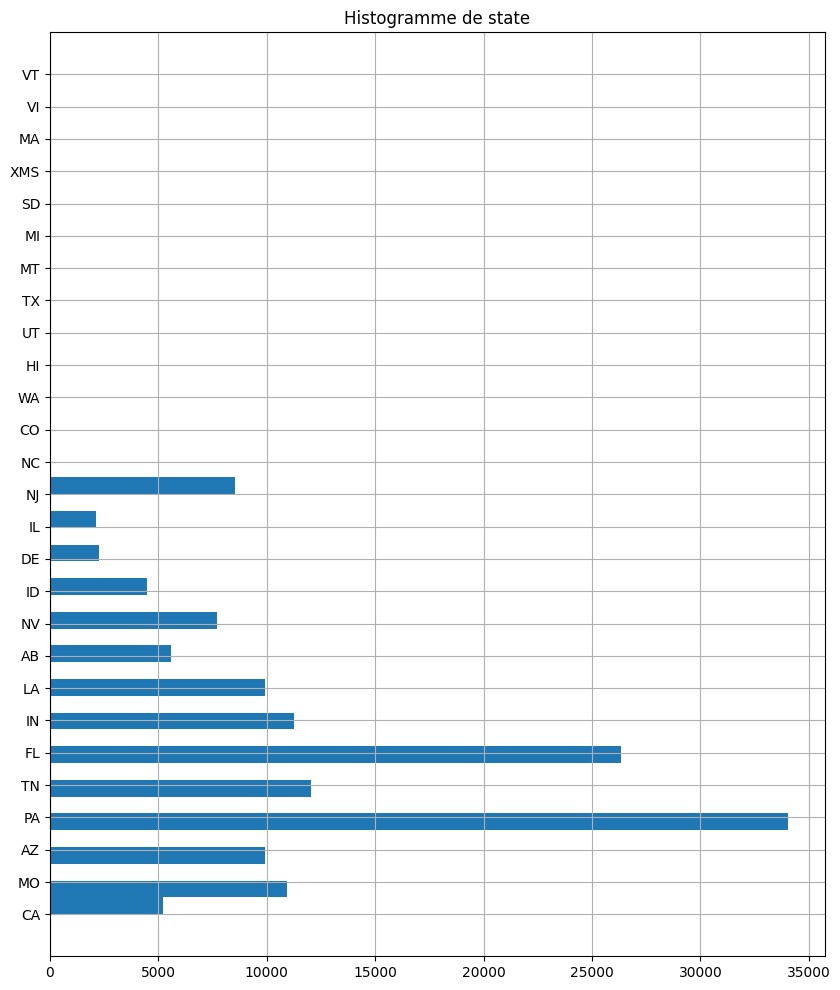

In [7]:
# Histogramme du nombre d'étoile
plt.figure(figsize=(10, 12))
df_business["state"].hist(bins=50, orientation='horizontal')
plt.title(f"Histogramme de state")
plt.show()

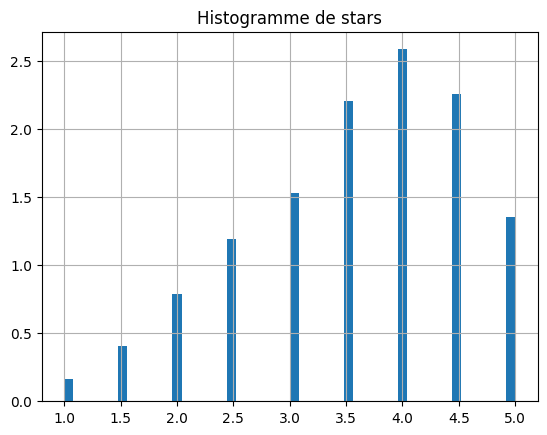

In [8]:
# Histogramme du nombre d'étoile
df_business["stars"].hist(density=True, bins=50)
plt.title(f"Histogramme de stars")
plt.show()

### <a name="C10">df_checkin</a>

In [9]:
df_checkin = pd.read_json('C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/Dataset/yelp_academic_dataset_checkin.json', lines=True)

In [10]:
df_checkin

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [11]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


Cette table ne sera pas conservée car elle ne possède pas d'information pertinente pour le projet.

### <a name="C10">df_review</a>

In [12]:
df_review = pd.read_json('C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/Dataset/yelp_academic_dataset_review.json', lines=True)

In [13]:
df_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [14]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [15]:
df_review.describe()

,stars,useful,funny,cool,date
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06,6990280
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01,2017-01-11 11:22:33.441780992
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2005-02-16 03:23:22
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-25 04:53:50.249999872
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2017-06-03 01:26:07
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2019-05-23 00:02:46.249999872
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02,2022-01-19 19:48:45
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00,NaN


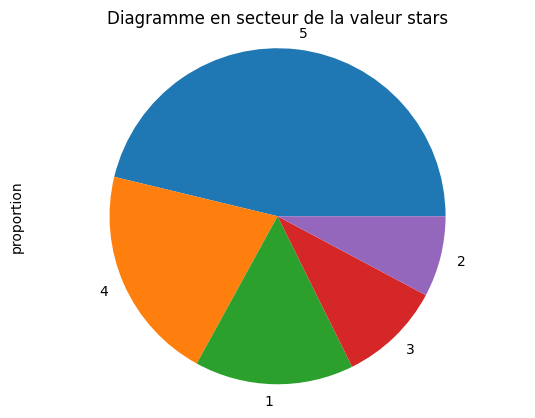

In [16]:
# Diagramme en secteurs
df_review["stars"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.title(f"Diagramme en secteur de la valeur stars")
plt.show() # Affiche le graphique

In [17]:
value_counts = df_review['stars'].value_counts().sort_index()
print(value_counts)

stars
1    1069561
2     544240
3     691934
4    1452918
5    3231627
Name: count, dtype: int64


### <a name="C10">df_tip</a>

In [18]:
df_tip = pd.read_json('C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/Dataset/yelp_academic_dataset_tip.json', lines=True)

In [19]:
df_tip

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [20]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


Cette table ne sera pas conservée car elle ne possède pas d'information pertinente pour le projet.

### <a name="C10">df_user</a>

In [21]:
df_user = pd.read_json('C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/Dataset/yelp_academic_dataset_user.json', lines=True)

In [22]:
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


Cette table ne sera pas conservée car elle ne possède pas d'information pertinente pour le projet.

### <a name="C10">df_photos</a>

In [24]:
df_photos = pd.read_json('C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/Photos/photos.json', lines=True)

In [25]:
df_photos

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food
...,...,...,...,...
200095,4Zia9NkAfQNjMfcIDhwJ-g,2HxkdqHmbYGj_BH1bLaiSw,#Nektar,food
200096,KB96KRZRhRm8hUkI-OpGEA,_gVyuTRb_6HM-SNtqbpevQ,,inside
200097,Klmojvaf2_2dP1XKzTsFmQ,NUyEOjfAl3HvkpzSpdwqeA,,food
200098,FNEiq7Mogec7t31OaU5juw,hE6YsHHV0fCz_UrGS4o6VA,Drinks by the water!,drink


In [26]:
df_photos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200100 non-null  object
 1   business_id  200100 non-null  object
 2   caption      200100 non-null  object
 3   label        200100 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


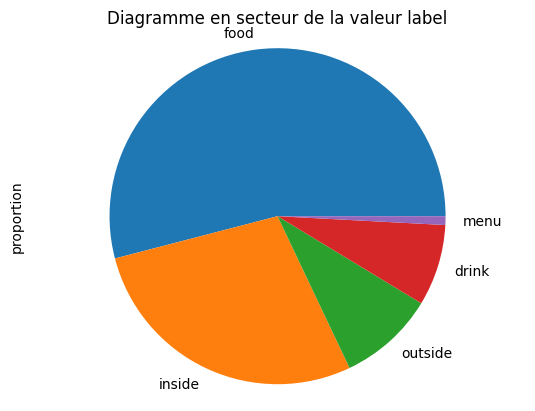

In [27]:
# Diagramme en secteurs
df_photos["label"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.title(f"Diagramme en secteur de la valeur label")
plt.show() # Affiche le graphique

In [28]:
value_counts = df_photos['label'].value_counts().sort_index()
print(value_counts)

label
drink       15670
food       108152
inside      56031
menu         1678
outside     18569
Name: count, dtype: int64


### <a name="C10">Préparation du jeu de données avis</a>

Sélection des restos parmi les le jeu de données business

In [29]:
df_resto_business = df_business[df_business['categories'].str.contains('restaurant', case=False, na=False)]
df_resto_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [30]:
df_resto_business.drop(['name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'hours'], axis=1, inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_24216\278246008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resto_business.drop(['name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'hours'], axis=1, inplace=True)


In [31]:
df_resto_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52286 entries, 3 to 150340
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  52286 non-null  object
 1   categories   52286 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


Sélection des commentaires négatifs

In [32]:
df_bad_reviews = df_review[df_review.stars <= 2]

In [33]:
df_bad_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
29,elqRpX9T3YwL07uLNtN3Bg,-sryo4gDYxbZ1T5Bz4l5Bw,ltBBYdNzkeKdCNPDAsxwAA,2,0,0,0,I at least have to give this restaurant two st...,2015-02-02 04:29:13
41,RB8UpF_kT2xoOC51OzXEeA,EZjT2qJN0mOXypMAqZdSrQ,A2q7d-CBM2-81tVkmS4JMw,2,1,1,0,"Straight to the point, it's cheap, it tastes a...",2017-07-08 18:58:42
46,Ki90-hauSIfW_7sBuBBqfA,Z2cOL3n9V8NoguJ-uU_Nvw,j8JOZvfeHEfUWq3gEz6ABQ,2,2,3,0,NEVER AGAIN. This is a so called restaurant th...,2014-06-11 14:55:14
47,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,1,1,0,0,If you want to pay for everything a la carte t...,2014-08-24 20:14:12
...,...,...,...,...,...,...,...,...,...
6990253,1ryZLb9pSBz0y66tHB-rfw,XJTO9x78TgWE94cmXqNduA,c3QxX3toWdqJnKQmmIliRQ,1,1,2,0,"The supper club is ridiculously expensive. So,...",2021-11-29 18:26:40
6990256,cOaCw12O2B3ER_Ir73w_bA,99_EbpwCcCRAa66YgorrKA,3MZ6DYP7EANJmP4UOW3PAw,1,0,0,0,The worst. Wish I had read all the other revie...,2016-04-27 04:14:52
6990257,tWCi4N2qCil876BI2NDAZg,5d32aJe0a3_fSl3LIVYkWQ,EmrOCT7fArKI0JI_XF6aaw,1,5,2,0,Temple University blatantly disregards freedom...,2021-08-28 18:46:05
6990266,PVRvzY0NxSU-fiK3JOXX7w,cTozFTTWjlFYc3yusdbZmA,uMVOtr16r1ELu46pWr4HCQ,1,0,0,0,Just average Thai food tonight. Bangkok has al...,2022-01-18 06:42:59


In [34]:
df_bad_reviews.drop(['user_id', 'useful', 'funny', 'cool', 'date'], axis=1, inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_24216\3202198353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad_reviews.drop(['user_id', 'useful', 'funny', 'cool', 'date'], axis=1, inplace=True)


In [35]:
df_bad_reviews

,review_id,business_id,stars,text
5,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1,I am a long term frequent customer of this est...
29,elqRpX9T3YwL07uLNtN3Bg,ltBBYdNzkeKdCNPDAsxwAA,2,I at least have to give this restaurant two st...
41,RB8UpF_kT2xoOC51OzXEeA,A2q7d-CBM2-81tVkmS4JMw,2,"Straight to the point, it's cheap, it tastes a..."
46,Ki90-hauSIfW_7sBuBBqfA,j8JOZvfeHEfUWq3gEz6ABQ,2,NEVER AGAIN. This is a so called restaurant th...
47,TcCcHzc3L6Aboq3DteEfZA,jNL5KUPz2-tHUJM__ysSaw,1,If you want to pay for everything a la carte t...
...,...,...,...,...
6990253,1ryZLb9pSBz0y66tHB-rfw,c3QxX3toWdqJnKQmmIliRQ,1,"The supper club is ridiculously expensive. So,..."
6990256,cOaCw12O2B3ER_Ir73w_bA,3MZ6DYP7EANJmP4UOW3PAw,1,The worst. Wish I had read all the other revie...
6990257,tWCi4N2qCil876BI2NDAZg,EmrOCT7fArKI0JI_XF6aaw,1,Temple University blatantly disregards freedom...
6990266,PVRvzY0NxSU-fiK3JOXX7w,uMVOtr16r1ELu46pWr4HCQ,1,Just average Thai food tonight. Bangkok has al...


Fusion

In [36]:
df_bad_reviews_resto = pd.merge(df_resto_business, df_bad_reviews, how='inner', on=['business_id'])
df_bad_reviews_resto

,business_id,categories,review_id,stars,text
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",QAy1XATH29BEtCBhuW2CeA,1,Horrible 3rd world service. After I picked out...
1,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",w_RPsuzN4eYqysjUJsxF2w,1,"Looks like a nice place from the outside, but ..."
2,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",b3ab4doiPEfnrI2U-r-1qQ,1,bun is sucked here and the waitress was really...
3,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",GVReujo6gtaS2O3CpYIw6g,1,TERRIBLE TERRIBLE service. I have never felt s...
4,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",coVz18GyxT9PJSkl-H8KLQ,2,Went just for the egg tarts. The crust was inc...
...,...,...,...,...,...
971717,cM6V90ExQD6KMSU3rRB5ZA,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",9YQhylYcA6i_Vx1_dNMYSw,2,The place has very high review and excited to ...
971718,cM6V90ExQD6KMSU3rRB5ZA,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",a2vvvqHK29v7IlmgRsufbw,1,They turned off the heaters while we were wait...
971719,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",qj66zNhqnzPUEjhu9SF3uQ,1,"Today I order from Uber eats, I order cheese e..."
971720,2O2K6SXPWv56amqxCECd4w,"Restaurants, Comfort Food, Food, Food Trucks, ...",q39JOIkHmIhdmYnjEhZCdQ,1,The truck was invited to our office for a part...


Consevation de tous les commentaires

In [37]:
df_all_reviews = df_review

In [38]:
df_all_reviews.drop(['user_id', 'useful', 'funny', 'cool', 'date'], axis=1, inplace=True)

Fusion

In [39]:
df_all_reviews_resto = pd.merge(df_resto_business, df_all_reviews, how='inner', on=['business_id'])
df_all_reviews_resto

,business_id,categories,review_id,stars,text
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",BXQcBN0iAi1lAUxibGLFzA,4,This is nice little Chinese bakery in the hear...
1,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",uduvUCvi9w3T2bSGivCfXg,4,This is the bakery I usually go to in Chinatow...
2,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",a0vwPOqDXXZuJkbBW2356g,5,"A delightful find in Chinatown! Very clean, an..."
3,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MKNp_CdR2k2202-c8GN5Dw,5,I ordered a graduation cake for my niece and i...
4,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",D1GisLDPe84Rrk_R4X2brQ,4,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...
...,...,...,...,...,...
4724679,hn9Toz3s-Ei3uZPt7esExA,"Middle Eastern, Restaurants",Lu5jvEjtPFUa-z9IzsMv7w,5,YES.\n\nI have been to 2 other comparable Midd...
4724680,hn9Toz3s-Ei3uZPt7esExA,"Middle Eastern, Restaurants",WbpiPPmiZYfDutO46AOJrA,5,We had the beef plate medium rare that was mou...
4724681,hn9Toz3s-Ei3uZPt7esExA,"Middle Eastern, Restaurants",cdwE0S1ONp1ypsTN1e3mLg,5,Excellent Mediterranean food! Always cooked to...
4724682,hn9Toz3s-Ei3uZPt7esExA,"Middle Eastern, Restaurants",uXnne-Ui2pvObTtT3MUYxg,4,This was my first visit to West Side Kebab Hou...


### <a name="C10">Préparation du jeu de données photos</a>

Fusion des 2 dataframes df_resto_business et df_photos

In [40]:
df_photos_resto = pd.merge(df_resto_business, df_photos, how='inner', on=['business_id'])
df_photos_resto

,business_id,categories,photo_id,caption,label
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,,food
1,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",7urDyNpZZ3Z8RpKLruaCNQ,,food
2,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",50yopBwRIA6zqZU8DLC2ZQ,(photographed by Dave Hong),outside
3,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",EigRJGqW5LDDQo99vjJppA,,food
4,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",z0OtsqP2Hy3nKngnfofLZA,,food
...,...,...,...,...,...
170484,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",diOT6f72dFqrbsHF16KmfA,,inside
170485,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",BtNImzaVtSj2s1P3UJq5aQ,,food
170486,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",EsRE2blcFcrjsURLbhNWDw,,inside
170487,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",KwL55c5Nryb7NQiA2cMTow,,food


In [41]:
df_photos_resto.drop(['caption'], axis=1, inplace=True)

In [42]:
df_photos_resto

,business_id,categories,photo_id,label
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food
1,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",7urDyNpZZ3Z8RpKLruaCNQ,food
2,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",50yopBwRIA6zqZU8DLC2ZQ,outside
3,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",EigRJGqW5LDDQo99vjJppA,food
4,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",z0OtsqP2Hy3nKngnfofLZA,food
...,...,...,...,...
170484,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",diOT6f72dFqrbsHF16KmfA,inside
170485,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",BtNImzaVtSj2s1P3UJq5aQ,food
170486,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",EsRE2blcFcrjsURLbhNWDw,inside
170487,WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",KwL55c5Nryb7NQiA2cMTow,food


Sélection des données

In [43]:
df_photos_resto_reduce = df_photos_resto.groupby('label').apply(lambda x: x.sample(n=200)).reset_index(drop=True)

In [44]:
df_photos_resto_reduce

,business_id,categories,photo_id,label
0,eubQohkn22b4IytlVNz20g,"Restaurants, Nightlife, Bars, Chicken Shop, Am...",SRkqwF8FYWT37j5dBBGQlw,drink
1,iXPEyHqvaDUWLn4pw-58Fw,"Breakfast & Brunch, Food, Coffee & Tea, Sandwi...",2OgluzjHXHOx0wagRTXFmw,drink
2,EQ-TZ2eeD_E0BHuvoaeG5Q,"Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...",_EA61NY3bg9TcN1QPaJEZw,drink
3,5DDdiTlpK6Z2fqFs4uSTQQ,"Food, American (New), Restaurants, Breweries, ...",tlhdn30f80ISmOL4u__1Sw,drink
4,Vpv7_M6dpg92GwappohXlw,"Seafood, Restaurants, Chicken Wings, Breakfast...",RR_3jytz7mhSFhp3kqB_Xw,drink
...,...,...,...,...
995,u0Bt7uvvj7LAjAdiMtrhug,"Middle Eastern, Restaurants",If5jA3EQkWvgn9M2zNeUaw,outside
996,QcQjRgBOf_LYum2HALgM5w,"Food, Coffee & Tea, Restaurants, Sandwiches, C...",sD9qFAmXRqB7tJmHaOqjRA,outside
997,SwJOeRUW0mFYDXTgJYx5fA,"Restaurants, Nurseries & Gardening, Food Stand...",i8q3Yfx6ctaxxPtSMQsxTQ,outside
998,GsT488GHjNdw6jA2f3QKqw,"Wineries, Breweries, Arts & Entertainment, Foo...",SKoyPieYozJOxmvomf9jzg,outside


### <a name="C10">Sélection d'un échantillon</a>

In [45]:
df_sample_bad_reviews_resto = df_bad_reviews_resto.sample(frac=0.01, random_state=42)

### <a name="C10">Traite les bad reviews méthode 1</a>

In [46]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Télécharger les ressources nécessaires de NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
df_sample_bad_reviews_resto['tokenized_text'] = df_sample_bad_reviews_resto['text'].apply(word_tokenize)

In [48]:
df_sample_bad_reviews_resto

,business_id,categories,review_id,stars,text,tokenized_text
882258,TyYpzJzeKWtyMdPFtPRUEg,"Pizza, Restaurants",THK_BUd5hDLYP3498MKiFQ,1,This place was horrible! They got my entire or...,"[This, place, was, horrible, !, They, got, my,..."
642407,LCMpkeQWHdCbuX0Nlkmeow,"Fast Food, Breakfast & Brunch, Tacos, Burgers,...",J04fJE99GPNtTlnZ21VFSA,1,I have no idea why I bother. It's the closest ...,"[I, have, no, idea, why, I, bother, ., It, 's,..."
831418,AZ42H2kk4JUiskC9NPoUjw,"Bars, Cajun/Creole, Nightlife, American (Tradi...",Y_1oPG4E5Lsm-e72jZPSRA,1,After reading glowing reviews of staff and foo...,"[After, reading, glowing, reviews, of, staff, ..."
452134,0CeoONLXqseUxPdGerefOQ,"Food, Mexican, Breakfast & Brunch, Restaurants...",VEb6uauln74EZHhTGWQQqA,1,Horrible Ground beef/bean Chimichanga. There w...,"[Horrible, Ground, beef/bean, Chimichanga, ., ..."
921422,QYEiZzwL8I4-q_3U0bq0eQ,"Juice Bars & Smoothies, Restaurants, Vitamins ...",AI7uZnXRkmx82rA--2ZGow,1,They are usually awesome but picked up a kale ...,"[They, are, usually, awesome, but, picked, up,..."
...,...,...,...,...,...,...
806946,gbMKr0Om2E1oE5f4z0mQgg,"Desserts, Italian, Seafood, Restaurants, Pizza...",nBCKv638DPotQfkP9igv_A,1,Pizza is on par with Digiorno that you can buy...,"[Pizza, is, on, par, with, Digiorno, that, you..."
572871,4klUc-NroGEM1vGzp2-0Qg,"Seafood, Restaurants, American (New), Cajun/Cr...",z6lDO1VD0eUCe9NuJoi-1w,2,"The food was great, the service was terrible. ...","[The, food, was, great, ,, the, service, was, ..."
43730,ZDg4siM2zLF4Rt8ZTqR8BA,"Sandwiches, Delis, Restaurants",J3Nq5Zy2ZvVkOSgSKfPT2A,1,We ordered a meat hoagie around closing time t...,"[We, ordered, a, meat, hoagie, around, closing..."
729257,4SEg-Ug9_UJRKsIhIEqDfQ,"Thai, Restaurants",2HbiB5EL4bOzsOwY-HFLsA,1,Previous visits to this place were pretty sati...,"[Previous, visits, to, this, place, were, pret..."


In [49]:
dg_stat = pd.DataFrame(columns=["business_id", "Fréquence", "Total", "Unique"])

old_id = ''
fzz = []
tot = 0
first = "Y"
for index, row in df_sample_bad_reviews_resto.iterrows():
    business_id = row['business_id']
    text = row['tokenized_text'].copy()
    if business_id != old_id and first == "N":
        freq = nltk.FreqDist(fzz)
        uniq = len(freq.keys())
        dg_stat = pd.concat([dg_stat, pd.DataFrame({"business_id": [old_id], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)
        fzz = text
        tot = len(text)
    else:
        first = "N"
        fzz.extend(text)
        tot += len(text)

    old_id = business_id

if fzz:
    freq = nltk.FreqDist(fzz)
    uniq = len(freq.keys())
    dg_stat = pd.concat([dg_stat, pd.DataFrame({"business_id": [old_id], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)

dg_stat

,business_id,Fréquence,Total,Unique
0,TyYpzJzeKWtyMdPFtPRUEg,"{'This': 1, 'place': 1, 'was': 3, 'horrible': ...",68,50
1,LCMpkeQWHdCbuX0Nlkmeow,"{'I': 7, 'have': 1, 'no': 1, 'idea': 1, 'why':...",75,56
2,AZ42H2kk4JUiskC9NPoUjw,"{'After': 2, 'reading': 1, 'glowing': 1, 'revi...",246,137
3,0CeoONLXqseUxPdGerefOQ,"{'Horrible': 1, 'Ground': 1, 'beef/bean': 1, '...",37,33
4,QYEiZzwL8I4-q_3U0bq0eQ,"{'They': 1, 'are': 1, 'usually': 1, 'awesome':...",41,35
...,...,...,...,...
9710,gbMKr0Om2E1oE5f4z0mQgg,"{'Pizza': 1, 'is': 3, 'on': 1, 'par': 1, 'with...",89,69
9711,4klUc-NroGEM1vGzp2-0Qg,"{'The': 1, 'food': 1, 'was': 6, 'great': 1, ',...",163,105
9712,ZDg4siM2zLF4Rt8ZTqR8BA,"{'We': 1, 'ordered': 1, 'a': 2, 'meat': 1, 'ho...",46,40
9713,4SEg-Ug9_UJRKsIhIEqDfQ,"{'Previous': 1, 'visits': 1, 'to': 18, 'this':...",505,225


In [50]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()

for index, row in dg_stat.iterrows():
    freq_totale += row['Fréquence']

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
#most_freq = zip(*freq_totale.most_common(100))[0]
most_common = freq_totale.most_common(100)
most_freq = [item[0] for item in most_common]
stopwords = most_freq
print(stopwords)
# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('english')))

['.', 'the', 'and', ',', 'I', 'to', 'was', 'a', 'of', 'it', 'for', 'in', 'that', 'is', "n't", 'The', 'we', 'not', 'were', 'but', '!', 'my', 'on', 'this', 'food', 'with', 'they', 'had', 'at', 'have', 'you', "'s", 'be', 'our', 'We', 'so', 'place', 'out', 'there', 'me', 'did', 'just', 'like', 'good', 'would', 'are', 'as', 'us', 'time', 'order', 'get', 'service', ')', 'up', 'back', '(', 'one', 'no', 'do', 'all', 'or', 'ordered', '?', 'here', 'from', 'if', 'It', 'about', 'an', 'very', "''", 'when', '``', 'go', '...', 'been', 'could', 'their', 'minutes', 'because', 'she', 'got', 'what', 'even', 'restaurant', 'only', 'came', 'he', 'which', '$', 'them', 'said', 'will', 'over', 'by', 'never', 'asked', 'My', 'after', 'They']


In [51]:
df_sample_bad_reviews_resto["cleaneded_text"] =  df_sample_bad_reviews_resto["tokenized_text"].apply(lambda x: [w for w in x if not w in list(sw)])

In [52]:
df_sample_bad_reviews_resto

,business_id,categories,review_id,stars,text,tokenized_text,cleaneded_text
882258,TyYpzJzeKWtyMdPFtPRUEg,"Pizza, Restaurants",THK_BUd5hDLYP3498MKiFQ,1,This place was horrible! They got my entire or...,"[This, place, was, horrible, !, They, got, my,...","[This, horrible, entire, wrong, made, sure, re..."
642407,LCMpkeQWHdCbuX0Nlkmeow,"Fast Food, Breakfast & Brunch, Tacos, Burgers,...",J04fJE99GPNtTlnZ21VFSA,1,I have no idea why I bother. It's the closest ...,"[I, have, no, idea, why, I, bother, ., It, 's,...","[idea, bother, closest, home, guess, always, e..."
831418,AZ42H2kk4JUiskC9NPoUjw,"Bars, Cajun/Creole, Nightlife, American (Tradi...",Y_1oPG4E5Lsm-e72jZPSRA,1,After reading glowing reviews of staff and foo...,"[After, reading, glowing, reviews, of, staff, ...","[After, reading, glowing, reviews, staff, disa..."
452134,0CeoONLXqseUxPdGerefOQ,"Food, Mexican, Breakfast & Brunch, Restaurants...",VEb6uauln74EZHhTGWQQqA,1,Horrible Ground beef/bean Chimichanga. There w...,"[Horrible, Ground, beef/bean, Chimichanga, ., ...","[Horrible, Ground, beef/bean, Chimichanga, The..."
921422,QYEiZzwL8I4-q_3U0bq0eQ,"Juice Bars & Smoothies, Restaurants, Vitamins ...",AI7uZnXRkmx82rA--2ZGow,1,They are usually awesome but picked up a kale ...,"[They, are, usually, awesome, but, picked, up,...","[usually, awesome, picked, kale, Caesar, salad..."
...,...,...,...,...,...,...,...
806946,gbMKr0Om2E1oE5f4z0mQgg,"Desserts, Italian, Seafood, Restaurants, Pizza...",nBCKv638DPotQfkP9igv_A,1,Pizza is on par with Digiorno that you can buy...,"[Pizza, is, on, par, with, Digiorno, that, you...","[Pizza, par, Digiorno, buy, grocery, store, Ex..."
572871,4klUc-NroGEM1vGzp2-0Qg,"Seafood, Restaurants, American (New), Cajun/Cr...",z6lDO1VD0eUCe9NuJoi-1w,2,"The food was great, the service was terrible. ...","[The, food, was, great, ,, the, service, was, ...","[great, terrible, greeted, extremely, rude, se..."
43730,ZDg4siM2zLF4Rt8ZTqR8BA,"Sandwiches, Delis, Restaurants",J3Nq5Zy2ZvVkOSgSKfPT2A,1,We ordered a meat hoagie around closing time t...,"[We, ordered, a, meat, hoagie, around, closing...","[meat, hoagie, around, closing, smelled, taste..."
729257,4SEg-Ug9_UJRKsIhIEqDfQ,"Thai, Restaurants",2HbiB5EL4bOzsOwY-HFLsA,1,Previous visits to this place were pretty sati...,"[Previous, visits, to, this, place, were, pret...","[Previous, visits, pretty, satisfactory, last,..."


### <a name="C10">Traite les bad reviews méthode TF-IDF</a>

In [53]:
df_sample_all_reviews_resto = df_all_reviews_resto.sample(frac=0.01, random_state=42)

In [54]:
df_sample_all_reviews_resto['tokenized_text'] = df_sample_all_reviews_resto['text'].apply(word_tokenize)

In [55]:
dg_all_stat = pd.DataFrame(columns=["business_id", "Fréquence", "Total", "Unique"])

old_id = ''
fzz = []
tot = 0
first = "Y"
for index, row in df_sample_all_reviews_resto.iterrows():
    business_id = row['business_id']
    text = row['tokenized_text'].copy()
    if business_id != old_id and first == "N":
        freq = nltk.FreqDist(fzz)
        uniq = len(freq.keys())
        dg_all_stat = pd.concat([dg_all_stat, pd.DataFrame({"business_id": [old_id], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)
        fzz = text
        tot = len(text)
    else:
        first = "N"
        fzz.extend(text)
        tot += len(text)

    old_id = business_id

if fzz:
    freq = nltk.FreqDist(fzz)
    uniq = len(freq.keys())
    dg_all_stat = pd.concat([dg_all_stat, pd.DataFrame({"business_id": [old_id], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)

dg_all_stat

,business_id,Fréquence,Total,Unique
0,6mP6BQu5fVtM-ZrSum-v0A,"{'The': 2, 'worst': 1, 'in': 1, 'the': 3, 'are...",68,54
1,xhEbn3BVfOyHrckP5BmyFQ,"{'This': 1, 'is': 1, 'a': 2, 'really': 1, 'gre...",112,73
2,vl2jDU7-FU9wftxc3iC_sw,"{'Such': 1, 'a': 4, 'cute': 2, 'place': 1, '!'...",240,143
3,qaDImxPguQz0jToNYvB1Eg,"{'Love': 1, 'love': 2, 'this': 2, 'place': 2, ...",83,57
4,QHWYlmVbLC3K6eglWoHVvA,"{'Datz': 1, 'is': 2, 'a': 2, 'classic': 1, 'st...",39,31
...,...,...,...,...
47238,_woUO4WVK1istX3jwBMyvg,"{'It': 4, 'is': 2, 'Sunday': 1, 'morning': 1, ...",383,204
47239,yRm3Xt90drxSKXegohsPGQ,"{'My': 1, 'wife': 1, 'got': 1, 'the': 2, 'capt...",18,15
47240,OJWt3ccwit_NdthGwjvAaQ,"{'I': 2, 'frequent': 1, 'others': 1, 'Paneras'...",67,55
47241,cOXc8c85Ms6dMEAJazLXHQ,"{'McGillins': 1, 'was': 1, 'a': 2, 'great': 1,...",56,46


In [56]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()

for index, row in dg_all_stat.iterrows():
    freq_totale += row['Fréquence']

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
#most_freq = zip(*freq_totale.most_common(100))[0]
most_common = freq_totale.most_common(100)
most_freq = [item[0] for item in most_common]
stopwords = most_freq
print(stopwords)
# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('english')))

['.', 'the', 'and', ',', 'I', 'a', 'to', 'was', 'of', '!', 'it', 'is', 'for', 'The', 'in', 'with', 'that', 'but', 'on', 'food', 'were', "n't", 'had', 'you', 'my', 'we', "'s", 'this', 'have', 'not', 'good', 'they', 'place', 'are', 'so', 'at', 'We', 'be', ')', 'as', '(', 'great', 'very', 'our', 'here', 'out', 'It', 'like', 'there', 'service', 'time', 'just', 'all', 'back', 'me', 'get', 'would', 'from', 'one', 'their', 'did', 'do', 'which', 'or', 'go', 'up', 'if', 'an', 'really', 'ordered', 'about', 'order', 'They', 'This', 'us', 'been', 'My', 'restaurant', '...', 'will', 'when', "'ve", 'got', 'some', 'can', 'more', 'delicious', 'also', '-', 'menu', 'chicken', 'only', 'by', 'your', 'what', 'because', 'too', '?', "''", 'nice']


In [57]:
#df_sample_all_reviews_resto["cleaneded_text"] =  df_sample_all_reviews_resto["tokenized_text"].apply(lambda x: [w for w in x if not w in list(sw)])
df_sample_all_reviews_resto["cleaneded_text"] = df_sample_all_reviews_resto["tokenized_text"].apply(lambda x: [w.lower() for w in x if w.lower() not in sw])

In [58]:
df_sample_all_reviews_resto

,business_id,categories,review_id,stars,text,tokenized_text,cleaneded_text
891991,6mP6BQu5fVtM-ZrSum-v0A,"Chinese, Restaurants",vq3fBXvPAhDoNgxZTEp2QA,1,The worst in the area. We assumed that all lit...,"[The, worst, in, the, area, ., We, assumed, th...","[worst, area, assumed, little, chinese, places..."
2795029,xhEbn3BVfOyHrckP5BmyFQ,"Restaurants, Comfort Food, Cajun/Creole",Re1xDwO5DvLRpIA9pBYugg,5,"This is a really great, clean location with am...","[This, is, a, really, great, ,, clean, locatio...","[clean, location, ample, parking, designated, ..."
1488256,vl2jDU7-FU9wftxc3iC_sw,"Restaurants, American (New), Food, Beer, Wine ...",f4ufhXrVoV8dYky0uqYsQA,5,Such a cute place! It's meant to be in the equ...,"[Such, a, cute, place, !, It, 's, meant, to, b...","[cute, meant, equally, cute, hyde, park, area,..."
495202,qaDImxPguQz0jToNYvB1Eg,"Mexican, Restaurants, Vegetarian, Coffee & Tea...",qbAlXeZzrpEj2QsUX8U7QQ,5,Love love love this place! Food is absolutely ...,"[Love, love, love, this, place, !, Food, is, a...","[love, love, love, absolutely, delish, must, c..."
4308282,QHWYlmVbLC3K6eglWoHVvA,"Burgers, Bars, Restaurants, American (Traditio...",g6e5fiYKRO9--hDeBFW6lg,5,Datz is a classic staple in Tampa. I enjoy the...,"[Datz, is, a, classic, staple, in, Tampa, ., I...","[datz, classic, staple, tampa, enjoy, birds, f..."
...,...,...,...,...,...,...,...
1875308,_woUO4WVK1istX3jwBMyvg,"Restaurants, Breakfast & Brunch",fley0hPDc64Q2oVGXkUajg,1,It is Sunday morning and I have to go to work ...,"[It, is, Sunday, morning, and, I, have, to, go...","[sunday, morning, work, think, love, pass, bre..."
743695,yRm3Xt90drxSKXegohsPGQ,"Restaurants, Seafood",ExwAN0X7Mp_NWpDcWOdQbA,5,My wife got the captain's platter and she love...,"[My, wife, got, the, captain, 's, platter, and...","[wife, captain, platter, loved, ate, especiall..."
3843876,OJWt3ccwit_NdthGwjvAaQ,"Bagels, Coffee & Tea, Sandwiches, Breakfast & ...",_LeKgdjqMxczCJXbsDV7Ig,1,"I frequent others Paneras, particularly the on...","[I, frequent, others, Paneras, ,, particularly...","[frequent, others, paneras, particularly, drex..."
3750713,cOXc8c85Ms6dMEAJazLXHQ,"Bars, Nightlife, Pubs, American (Traditional),...",SsMXtUMzeyDM0XUubT_YPw,4,McGillins was a great little pub in Philly. Ap...,"[McGillins, was, a, great, little, pub, in, Ph...","[mcgillins, little, pub, philly, apparently, o..."


In [82]:
text_data = df_sample_all_reviews_resto['cleaneded_text']

In [85]:
text_data

891991     [worst, area, assumed, little, chinese, places...
2795029    [clean, location, ample, parking, designated, ...
1488256    [cute, meant, equally, cute, hyde, park, area,...
495202     [love, love, love, absolutely, delish, must, c...
4308282    [datz, classic, staple, tampa, enjoy, birds, f...
                                 ...                        
1875308    [sunday, morning, work, think, love, pass, bre...
743695     [wife, captain, platter, loved, ate, especiall...
3843876    [frequent, others, paneras, particularly, drex...
3750713    [mcgillins, little, pub, philly, apparently, o...
3560098    [visiting, cottonwood, grille, happy, hour, we...
Name: cleaneded_text, Length: 47247, dtype: object

In [86]:
print(text_data.apply(type).value_counts())

cleaneded_text
<class 'list'>    47247
Name: count, dtype: int64


In [87]:
# Convertir les listes en chaînes de caractères
text_data = text_data.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [88]:
text_data

891991     worst area assumed little chinese places wrong...
2795029    clean location ample parking designated parkin...
1488256    cute meant equally cute hyde park area town vi...
495202     love love love absolutely delish must cookies ...
4308282    datz classic staple tampa enjoy birds feather ...
                                 ...                        
1875308    sunday morning work think love pass breakfast ...
743695     wife captain platter loved ate especially scal...
3843876    frequent others paneras particularly drexel hi...
3750713    mcgillins little pub philly apparently oldest ...
3560098    visiting cottonwood grille happy hour weekend ...
Name: cleaneded_text, Length: 47247, dtype: object

In [89]:


# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
   random_state = 8,
   normalize_plurals = False,
   width = 600,
   height= 300,
   max_words = 300,
   stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(' '.join(text_data))

(-0.5, 599.5, 299.5, -0.5)

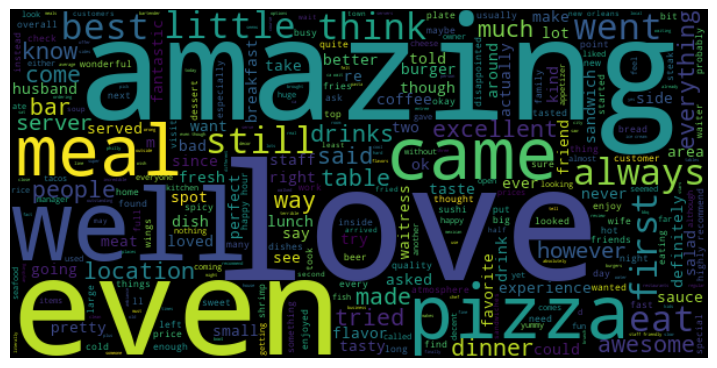

In [90]:
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [72]:
# Fonction pour convertir les étoiles en sentiment
def stars_to_sentiment(stars):
    if stars in [1, 2]:
        return 'negatif'
    else:  # 3, 4 ou 5
        return 'positif'

# Appliquer la fonction à la colonne 'stars'
df_sample_all_reviews_resto['sentiment'] = df_sample_all_reviews_resto['stars'].apply(stars_to_sentiment)

# Vérification des premiers résultats
print(df_sample_all_reviews_resto[['stars', 'sentiment']].head())

         stars sentiment
891991       1   negatif
2795029      5   positif
1488256      5   positif
495202       5   positif
4308282      5   positif


In [73]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=200)

#text_data = df_sample_all_reviews_resto['cleaneded_text']

#print(text_data.apply(type).value_counts())

# Convertir les listes en chaînes de caractères
#text_data = text_data.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

#print(text_data)

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(text_data)
y = df_sample_all_reviews_resto['sentiment'] 

print(X)

cleaneded_text
<class 'list'>    47247
Name: count, dtype: int64
891991     worst area assumed little chinese places wrong...
2795029    clean location ample parking designated parkin...
1488256    cute meant equally cute hyde park area town vi...
495202     love love love absolutely delish must cookies ...
4308282    datz classic staple tampa enjoy birds feather ...
                                 ...                        
1875308    sunday morning work think love pass breakfast ...
743695     wife captain platter loved ate especially scal...
3843876    frequent others paneras particularly drexel hi...
3750713    mcgillins little pub philly apparently oldest ...
3560098    visiting cottonwood grille happy hour weekend ...
Name: cleaneded_text, Length: 47247, dtype: object
  (0, 70)	0.3860339521487979
  (0, 25)	0.33678887842607974
  (0, 89)	0.37685752294458424
  (0, 178)	0.3890293237457551
  (0, 171)	0.3486251605861101
  (0, 127)	0.3650813448312168
  (0, 95)	0.2865946674421425
  (0,

In [74]:
# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [75]:
print(vocab)

['10' 'actually' 'always' 'amazing' 'another' 'anything' 'area' 'around'
 'ask' 'asked' 'atmosphere' 'away' 'awesome' 'bad' 'bar' 'beef' 'beer'
 'best' 'better' 'big' 'bit' 'bread' 'breakfast' 'burger' 'busy' 'ca'
 'came' 'check' 'cheese' 'clean' 'coffee' 'cold' 'come' 'coming' 'cooked'
 'could' 'customer' 'day' 'decided' 'definitely' 'dessert' 'different'
 'dining' 'dinner' 'disappointed' 'dish' 'dishes' 'drink' 'drinks' 'eat'
 'eating' 'enjoy' 'enjoyed' 'enough' 'even' 'ever' 'every' 'everyone'
 'everything' 'excellent' 'experience' 'family' 'fantastic' 'fast'
 'favorite' 'feel' 'find' 'first' 'fish' 'flavor' 'found' 'fresh' 'fried'
 'friend' 'friendly' 'friends' 'fries' 'full' 'give' 'going' 'half'
 'happy' 'highly' 'home' 'hot' 'hour' 'however' 'huge' 'husband' 'inside'
 'kind' 'know' 'large' 'last' 'left' 'little' 'll' 'location' 'long'
 'looking' 'lot' 'love' 'loved' 'lunch' 'made' 'make' 'manager' 'many'
 'maybe' 'meal' 'meat' 'minutes' 'much' 'must' 'never' 'new' 'next'
 'night

In [63]:
docterm.shape

(47247, 200)

In [64]:
docterm.max()

10           0.935582
actually     0.889240
always       1.000000
amazing      1.000000
another      0.784551
               ...   
went         1.000000
wine         1.000000
wonderful    1.000000
worth        1.000000
years        1.000000
Length: 200, dtype: float64

In [65]:
docterm.sum()

10            625.157520
actually      434.534565
always       1432.364143
amazing      1474.691390
another       597.605972
                ...     
went         1084.565349
wine          482.424771
wonderful     581.422222
worth         796.824211
years         511.485435
Length: 200, dtype: float64

In [66]:
print(docterm)

             10  actually  always   amazing   another  anything      area  \
0      0.000000       0.0     0.0  0.000000  0.000000       0.0  0.327453   
1      0.226042       0.0     0.0  0.179486  0.000000       0.0  0.000000   
2      0.000000       0.0     0.0  0.139800  0.169474       0.0  0.158747   
3      0.000000       0.0     0.0  0.201335  0.000000       0.0  0.000000   
4      0.000000       0.0     0.0  0.000000  0.000000       0.0  0.000000   
...         ...       ...     ...       ...       ...       ...       ...   
47242  0.125180       0.0     0.0  0.000000  0.120495       0.0  0.000000   
47243  0.000000       0.0     0.0  0.000000  0.000000       0.0  0.000000   
47244  0.000000       0.0     0.0  0.000000  0.000000       0.0  0.000000   
47245  0.000000       0.0     0.0  0.000000  0.000000       0.0  0.000000   
47246  0.000000       0.0     0.0  0.000000  0.158557       0.0  0.000000   

         around       ask     asked  ...  waitress      want    wanted  \
0

### <a name="C10">Utilisation de modèle non supervisé</a>

### <a name="C10">Bonus: Utilisation de modèle supervisé</a>

In [77]:
from sklearn.model_selection import train_test_split

# Diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

# Instancier et entraîner le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

LogisticRegression()

In [79]:
from sklearn.metrics import accuracy_score, classification_report

# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Afficher un rapport de classification détaillé
print(classification_report(y_test, y_pred))

Accuracy: 0.8609523809523809
              precision    recall  f1-score   support

     negatif       0.73      0.53      0.61      1975
     positif       0.88      0.95      0.92      7475

    accuracy                           0.86      9450
   macro avg       0.81      0.74      0.76      9450
weighted avg       0.85      0.86      0.85      9450



In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#X = vectorizer.fit_transform(df_sample_all_reviews_resto['cleaneded_text'])  # Texte vectorisé
#y = df_sample_all_reviews_resto['sentiment']  # Labels (positif, neutre, négatif)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle SVM
svm_model = SVC(kernel='linear')  # Vous pouvez essayer 'linear', 'rbf', etc.

# Entraînement du modèle
svm_model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_svm = svm_model.predict(X_test)

# Évaluation du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.8606349206349206
              precision    recall  f1-score   support

     negatif       0.74      0.52      0.61      1975
     positif       0.88      0.95      0.92      7475

    accuracy                           0.86      9450
   macro avg       0.81      0.73      0.76      9450
weighted avg       0.85      0.86      0.85      9450



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#X = vectorizer.fit_transform(df_sample_all_reviews_resto['cleaneded_text'])  # Texte vectorisé
#y = df_sample_all_reviews_resto['sentiment']  # Labels (positif, neutre, négatif)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forests): {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))


Accuracy (Random Forests): 0.8500529100529101
              precision    recall  f1-score   support

     negatif       0.74      0.43      0.55      1975
     positif       0.87      0.96      0.91      7475

    accuracy                           0.85      9450
   macro avg       0.80      0.70      0.73      9450
weighted avg       0.84      0.85      0.83      9450

